# Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения

В качестве исходных данных были взяты результаты экспериментальных
исследований, проводимых в целях улучшения технологического процесса
электронно-лучевой сварки изделия, сборка которого состоит из элементов,
состоящих из разнородного материала.
Установка электронно-лучевой сварки, на которой проводились
исследования, предназначена для сварки электронным лучом в глубоком вакууме
деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых
и специальных сплавов.
Существующая установка электронно-лучевой сварки обеспечивает
повторяемость режимов в рамках возможностей реализованной системы
управления. Работы по сварке выполнялись на образцах-имитаторах,
соответствующих технологическому изделию.

Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической
системы (FP).

По совокупности параметров технологических режимов обеспечивались
минимально возможные размеры сварных швов: глубина шва (Depth) и ширина
шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка
18-ти единиц образцов. Результаты металлографического контроля
по размерам сварного шва для каждого образца проводились в 4-х поперечных
сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне
19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки,
размеров сварочных швов в поперечных сечениях всех образцов.

**Задача:**

Решить задачу регрессии (одним или несколькими методами)
для предсказания глубины и ширины сварного соединения, выполнив
необходимые этапы (разведочный анализ, предобработка)

**План:**

1. Загрузить датасет
2. Провести очистку (если необходимо)
3. Сделать исследовательский анализ данных
4. Построить и оценить модели
5. Сделать выводы

In [21]:
# установим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## 1. Загрузка датасета

In [2]:
df = pd.read_csv('ebw_data1.csv')

In [3]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


## 2. Проверим датасет (проведем очистку)

In [4]:
# создадим функцию, которая покажет всю общую информацию о датасете
def show_info(df_name):  
    display(df_name.head(10))
    print('-------------------------------------------')
    print(df_name.info())
    print('-------------------------------------------')
    print('Количество пропусков:', df_name.isna().sum())
    print('-------------------------------------------')
    print('Количество дубликатов:', df_name.duplicated().sum())

In [5]:
show_info(df)

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
5,45,140,4.5,80,1.72,2.48
6,45,140,4.5,80,1.64,2.52
7,45,140,4.5,80,1.64,2.56
8,45,140,8.0,80,1.20,2.00
9,45,140,8.0,80,1.20,1.96


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB
None
-------------------------------------------
Количество пропусков: IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64
-------------------------------------------
Количество дубликатов: 7


In [7]:
# в данных есть дубликаты. Удалим них.
df.drop_duplicates(inplace=True)
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      65 non-null     int64  
 1   IF      65 non-null     int64  
 2   VW      65 non-null     float64
 3   FP      65 non-null     int64  
 4   Depth   65 non-null     float64
 5   Width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB


**Вывод:** Нам был дан датасет из 6 столбцов и 72 строк. Датасет чистый: нет пропусков, корректные типы данных. Но были дубликаты. После удаления дубликата количество строк стало равным 65. Можем переходить к следующему этапу.

## 3. Исследовательский анализ данных

In [9]:
# взглянем на описательную статистику датафрейма
df.describe()

,IW,IF,VW,FP,Depth,Width
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,45.769231,140.907692,8.669231,80.000000,1.192615,1.977077
std,1.674900,5.070512,2.097761,21.650635,0.234136,0.281945
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.040000,1.780000
50%,46.000000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.280000,2.080000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


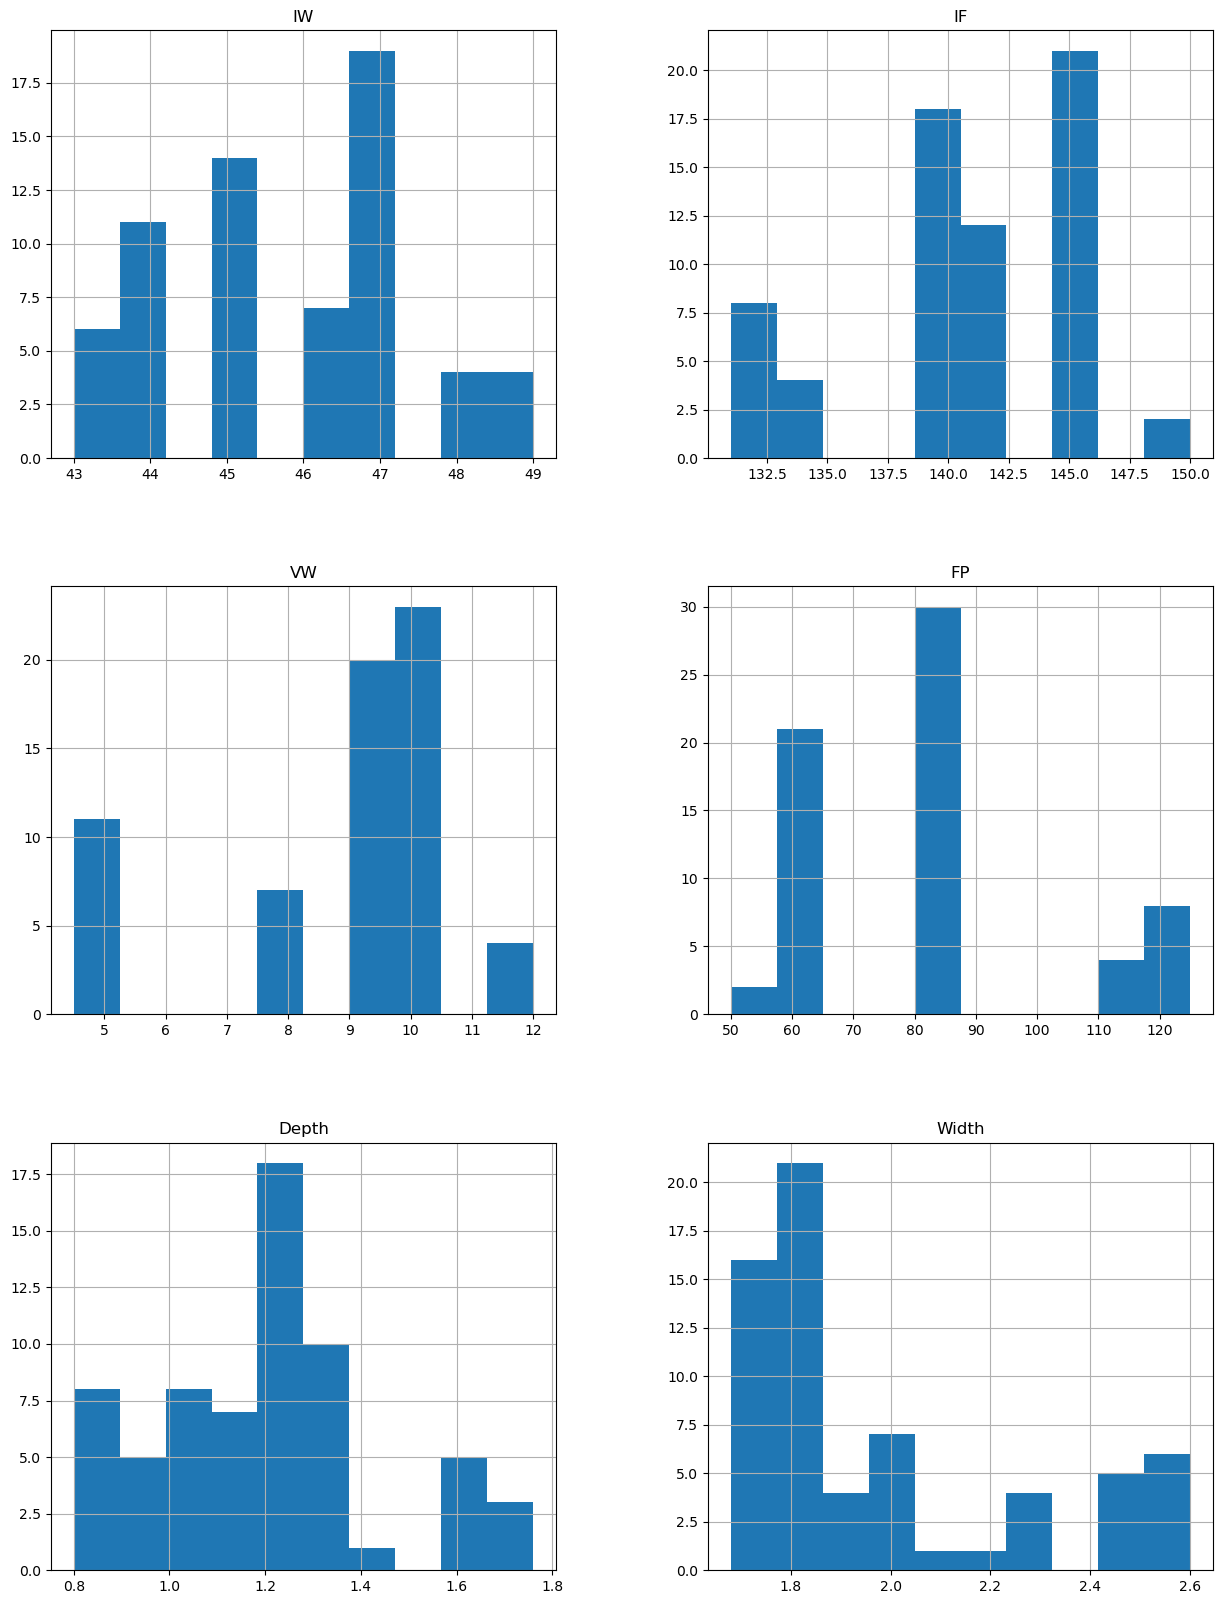

In [10]:
# построим гистограммы признаков
df.hist(figsize=(15, 20));

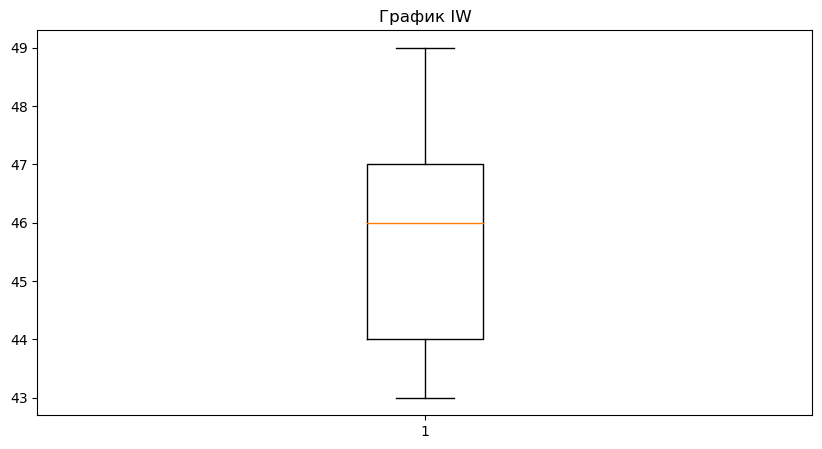

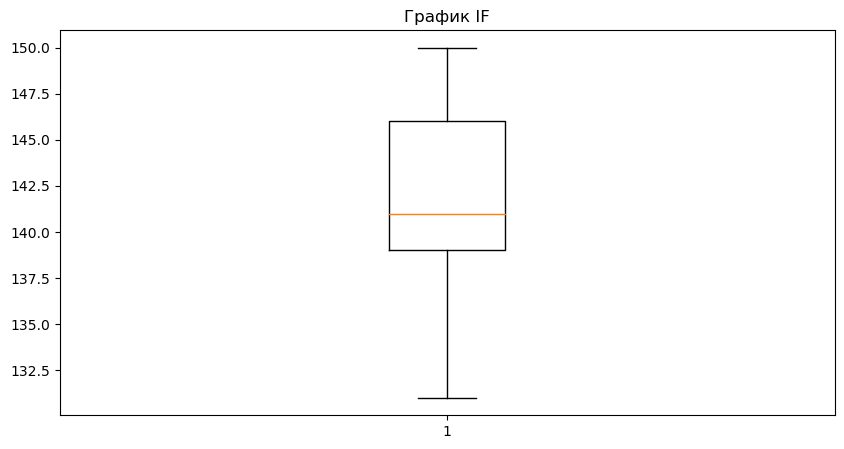

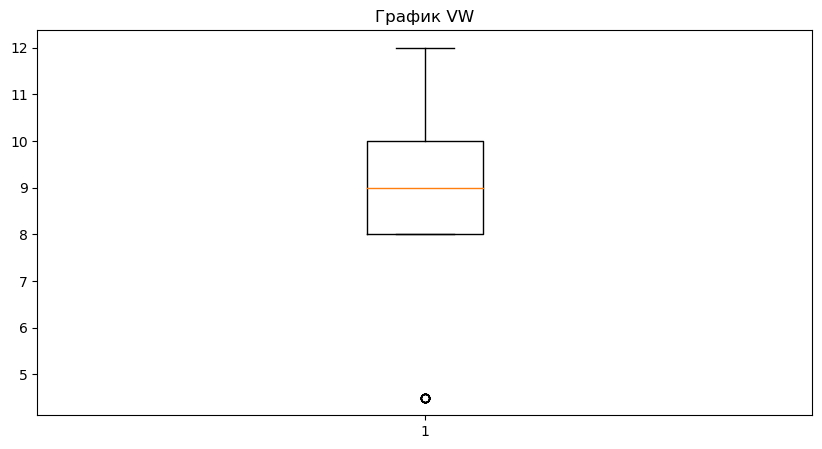

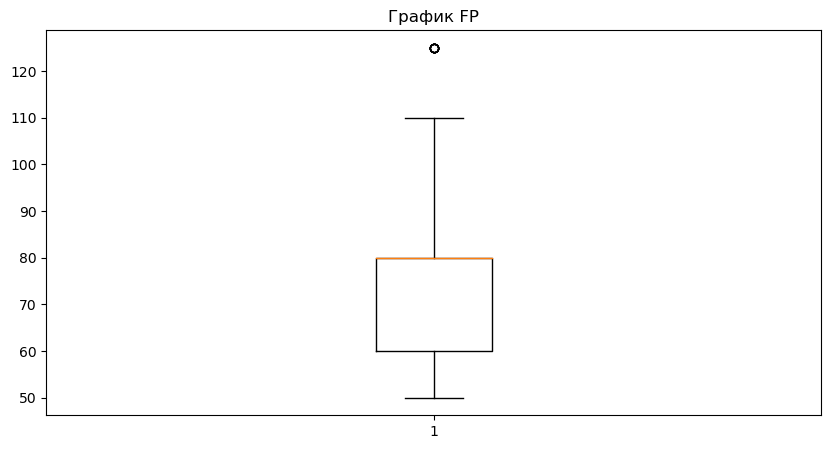

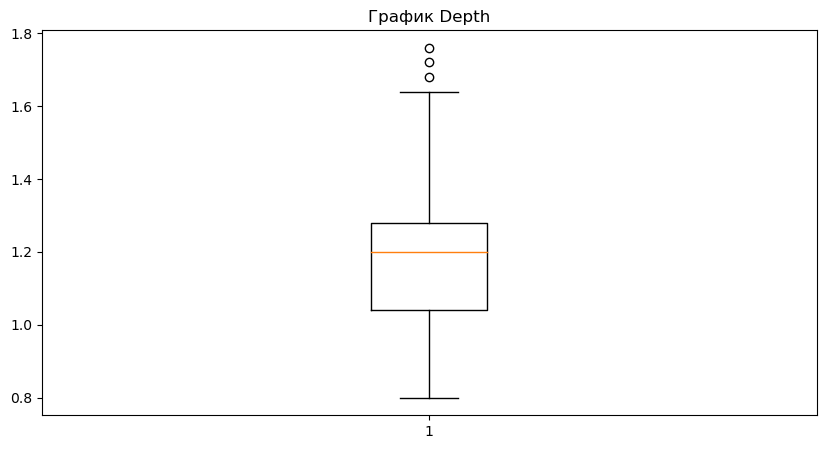

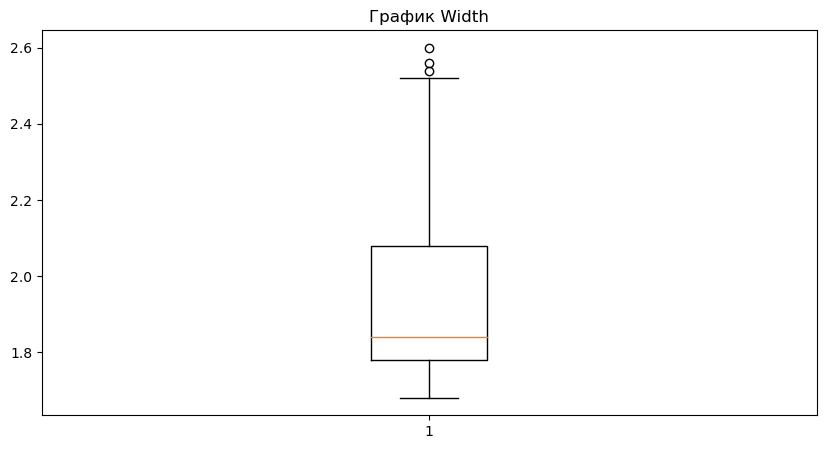

In [11]:
# посмотрим на данные и выбросы, построив боксплоты.
for i in df.columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[i])
    plt.title('График '+ i)
    plt.show()

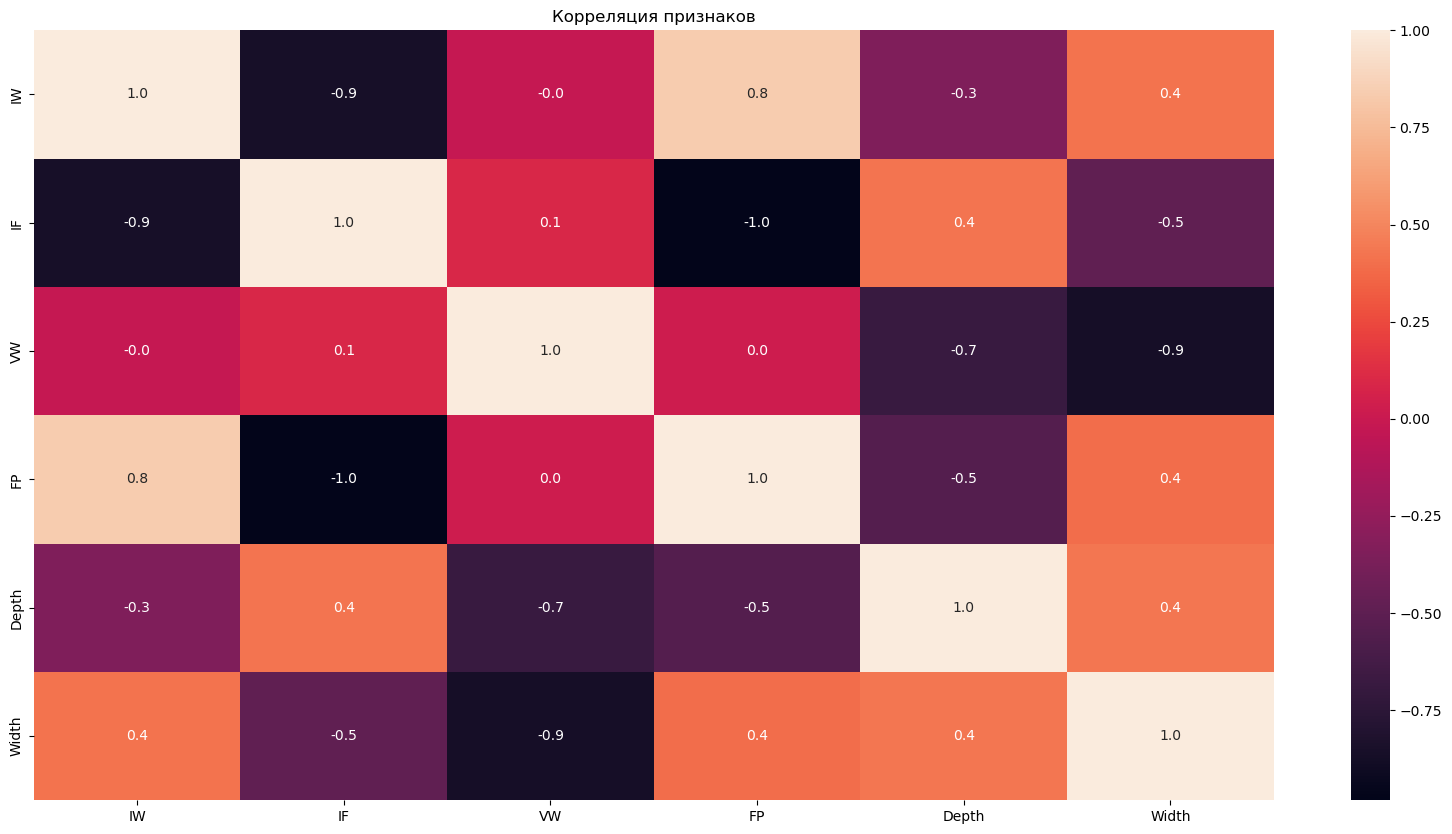

In [12]:
# изучим корреляцию признаков
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Корреляция признаков')
plt.show()

**Вывод:** На графиках мы можем видеть разбросы значений, выбросы. Но средние значения показателей близки к медианным значениям, к тому же у нас не так много данных (всего 65 строк), в связи с этим будем считать, что "выбросы" на графиках это не фактические выбросы. И как-либо бороться с ними мы не будем. Изучив корреляцию признаков мы заметили, что глубина и ширина шва скварки имеет сильную обратную зависимость от скорости сварки. Т.е. чем выше скорость, тем меньше ширина и глубина шва.

## 4. Построение модели предсказания глубины и ширины шва

In [13]:
df.columns

Index(['IW', 'IF', 'VW', 'FP', 'Depth', 'Width'], dtype='object')

In [14]:
# выделим целевые признаки 'Depth'(глубина) и 'Width'(ширина). Разделим датасет на обучающую и тестовую выборки
features = df.drop(['Depth', 'Width'], axis=1)
target = df[['Depth', 'Width']]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, 
                                                                            random_state=25)

In [15]:
# посмотрим на размер выборок
print('Размер обучающей выборки:', features_train.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер обучающей выборки: (52, 4)
Размер тестовой выборки: (13, 4)


In [16]:
# построим модель линейной регрессии
parameters_lr = {'n_jobs': [-1, 0, 1],
                 'normalize': [True, False]}
model_lr = LinearRegression()
grid_lr = GridSearchCV(estimator=model_lr, param_grid=parameters_lr, scoring='neg_mean_absolute_error', cv=5)
grid_lr.fit(features_train, target_train)
best_param_lr = grid_lr.best_params_
mae_lr = cross_val_score(model_lr, 
                              features_train, 
                              target_train, 
                              cv=5,
                              scoring='neg_mean_absolute_error').mean()
print('Лучшие параметры для линейной регрессии:', best_param_lr)
print('\n')
print('Среднее MAE на обучающей выборке:', mae_lr * -1)
print('\n')

Лучшие параметры для линейной регрессии: {'n_jobs': -1, 'normalize': True}


Среднее MAE на обучающей выборке: 0.06828956413853352




In [17]:
# используем лучшие параметры модели для ее тестирования
model_lr.set_params(**best_param_lr)
model_lr.fit(features_train, target_train)
predict_lr = model_lr.predict(features_test)
mae_lr_on_test = mean_absolute_error(target_test, predict_lr)
print('MAE модели LinearRegression на тестовой выборке:', mae_lr_on_test)

MAE модели LinearRegression на тестовой выборке: 0.0703815718580502


In [18]:
predict_lr

array([[0.82009335, 2.0194898 ],
       [1.59627409, 2.512698  ],
       [1.10823496, 1.78832782],
       [1.47468011, 2.42575352],
       [1.25198574, 1.81138982],
       [1.22982894, 1.8752723 ],
       [1.10823496, 1.78832782],
       [1.59627409, 2.512698  ],
       [1.10823496, 1.78832782],
       [0.82009335, 2.0194898 ],
       [1.25198574, 1.81138982],
       [1.22982894, 1.8752723 ],
       [0.86735901, 2.28530007]])

## 5. Выводы

In [20]:
# создадим общий датафрейм с результатами исследования
result = pd.DataFrame({'Лучшие параметры модели':["'n_jobs': -1, 'normalize': True"],
                       'MAE в обучении':[0.068],
                       'MAE на тесте':[0.070]})
print(result)

           Лучшие параметры модели  MAE в обучении  MAE на тесте
0  'n_jobs': -1, 'normalize': True           0.068          0.07


В результате исследования нам удалось построить модели для прогнозирования глубины и ширины сварного шва. МАЕ (средняя абсолютная ошибка) для предсказания глубины и ширины на тестовой выборке показала результат 0.07, что означает расхождение на плюс/минус семь сотых милиметра (или сантиметра, в зависимости от единиц измерения) от фактического значения. 
Т.о. можем считать, что построенные нами модели успешно справляются с прогнозами и дают лишь незначительную погрешность. 